**Approach to CNN**

1. Download images from the link
2. Unzip all the images
3. Load the images and the libraries (Image Dataset from Directory)
4. Explore some of the images (visualize)
5. Create a Sequential Model (Feature Extraction Layers + Classification Layers)
6. Declare the Layers
   1. Convolutional Layers + Relu Layer
   2. Pooling
   3. Classification Layers
   4. Output Layers
7. Compile the model (Optimizer, Loss, Metrics)
8. fit the model (input, output, epochs, batch size)
9. Evaluate the model

Download the images

In [ ]:
!wget 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

--2024-10-19 02:19:43--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.195.207, 172.253.117.207, 74.125.20.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.195.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   163MB/s    in 0.4s    

2024-10-19 02:19:43 (163 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



Unzip the images

In [ ]:
!unzip '/content/cats_and_dogs_filtered.zip'

Archive:  /content/cats_and_dogs_filtered.zip
   creating: cats_and_dogs_filtered/
  inflating: cats_and_dogs_filtered/vectorize.py  
   creating: cats_and_dogs_filtered/validation/
   creating: cats_and_dogs_filtered/train/
   creating: cats_and_dogs_filtered/validation/dogs/
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2122.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2121.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2120.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2119.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/dog.2118.jpg  
  inflating: cats_and_dogs_filtered/validation/dogs/

Load the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [ ]:
train_dir = '/content/cats_and_dogs_filtered/train'
val_dir = '/content/cats_and_dogs_filtered/validation'

Load the images

In [ ]:
train_dataset = image_dataset_from_directory(train_dir, shuffle = True, batch_size = 64, image_size = (160,160), seed = 123)

Found 2000 files belonging to 2 classes.


In [ ]:
test_dataset = image_dataset_from_directory(val_dir, shuffle = True, batch_size = 64, image_size = (160,160), seed = 123)

Found 1000 files belonging to 2 classes.


Create a Sequential Model with Layers

In [ ]:
model = Sequential()
#Feature Extraction Layers
#Block1
model.add(Conv2D(64, (3,3), padding = 'same',activation = 'relu', input_shape = (160,160,3)))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Block2
model.add(Conv2D(128, (3,3), padding = 'same' ,activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Block3
model.add(Conv2D(256, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Block4
model.add(Conv2D(512, (3,3), padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))
#Classification Layers
model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.2))
#Output Layer
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 160, 160, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 80, 80, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 80, 80, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 40, 40, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 40, 40, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 20, 20, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 20, 20, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │      13,107,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,658,689 (55.92 MB)

 Trainable params: 14,658,689 (55.92 MB)

 Non-trainable params: 0 (0.00 B)

Compile The model

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Fit the model

In [ ]:
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs = 50, batch_size = 64, callbacks = [callback])

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 38s 694ms/step - accuracy: 0.4748 - loss: 233.9191 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.5201 - loss: 0.6924 - val_accuracy: 0.4730 - val_loss: 0.6934
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - accuracy: 0.5149 - loss: 0.6909 - val_accuracy: 0.5040 - val_loss: 0.6926
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.5412 - loss: 0.6890 - val_accuracy: 0.5450 - val_loss: 0.6889
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 154ms/step - accuracy: 0.5433 - loss: 0.6870 - val_accuracy: 0.5070 - val_loss: 0.6931
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 207ms/step - accuracy: 0.5105 - loss: 0.6905 - val_accuracy: 0.5280 - val_loss: 0.6868
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.5688 - loss: 0.6801 - val_accuracy: 0.5640 - val_loss: 0.6824
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 209ms/step - accuracy: 0.5550 - loss: 0.6816 - val_accur

Evaluate the model results

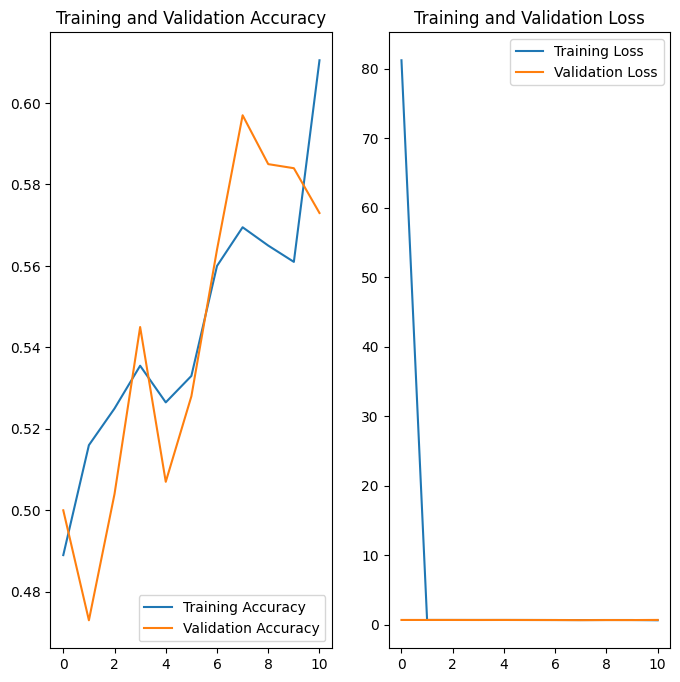

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

num_epochs = len(history.history['loss'])
epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [ ]:
y_pred = model.predict(test_dataset)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step


In [ ]:
y_pred

array([[0.80681044],
       [0.7022528 ],
       [0.63896656],
       [0.71180886],
       [0.36022976],
       [0.33866146],
       [0.6397889 ],
       [0.5237679 ],
       [0.65409034],
       [0.5506944 ],
       [0.4418983 ],
       [0.5790767 ],
       [0.3865926 ],
       [0.3267592 ],
       [0.46807292],
       [0.5618529 ],
       [0.48493358],
       [0.522988  ],
       [0.45790446],
       [0.5837447 ],
       [0.6789198 ],
       [0.55984926],
       [0.9488863 ],
       [0.39067814],
       [0.6581418 ],
       [0.7962275 ],
       [0.79108864],
       [0.7697814 ],
       [0.71804506],
       [0.8286024 ],
       [0.5659928 ],
       [0.73858124],
       [0.41574642],
       [0.6420363 ],
       [0.56087005],
       [0.831337  ],
       [0.5116295 ],
       [0.5079555 ],
       [0.43854338],
       [0.7667539 ],
       [0.61743754],
       [0.65412635],
       [0.78025126],
       [0.8823816 ],
       [0.65948904],
       [0.564973  ],
       [0.5967918 ],
       [0.810

In [ ]:
y_pred = (y_pred > 0.5).astype(int)

In [ ]:
y_pred

array([[1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
    

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.31      0.37       500
           1       0.49      0.66      0.56       500

    accuracy                           0.48      1000
   macro avg       0.48      0.48      0.47      1000
weighted avg       0.48      0.48      0.47      1000

Confusion Matrix:
[[154 346]
 [171 329]]
Accuracy Score: 0.483


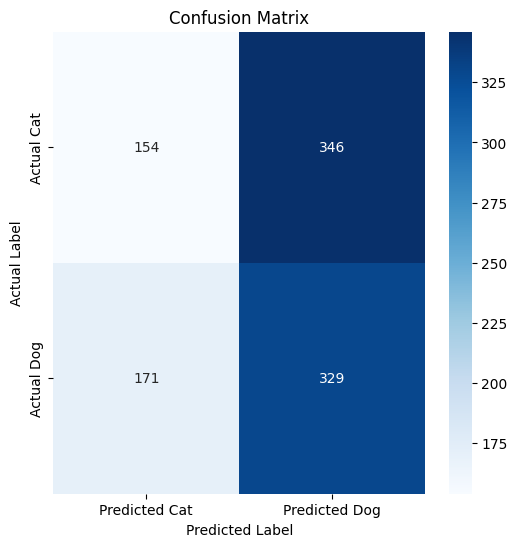

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Get predictions on the test dataset
y_pred = model.predict(test_dataset)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions

# Get true labels from the test dataset
y_true = np.concatenate([y for x, y in test_dataset], axis=0)


# Generate the classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate the accuracy score
accuracy = accuracy_score(y_true, y_pred)
print("Accuracy Score:", accuracy)

# You can also visualize the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Cat', 'Predicted Dog'],
            yticklabels=['Actual Cat', 'Actual Dog'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()